<ipython-input-1-81f941713d67>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-1-81f941713d67>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Epoch 1/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5882 - loss: 0.6850 - val_accuracy: 0.6480 - val_loss: 0.6173
Epoch 2/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6935 - loss: 0.5994 - val_accuracy: 0.7095 - val_loss: 0.5715
Epoch 3/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7008 - loss: 0.5651 - val_accuracy: 0.7598 - val_loss: 0.5408
Epoch 4/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.5742 - val_accuracy: 0.7654 - val_loss: 0.5200
Epoch 5/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.5281 - val_accuracy: 0.8268 - val_loss: 0.5054
Epoch 6/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7661 - loss: 0.5126 - val_accuracy: 0.7989 - val_loss: 0.4964
Epoch 7/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4838 - val_accuracy: 0.7989 - val_loss: 0.4873
Epoch 8/62
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.4980 - val_accuracy: 0.7989 - val_loss

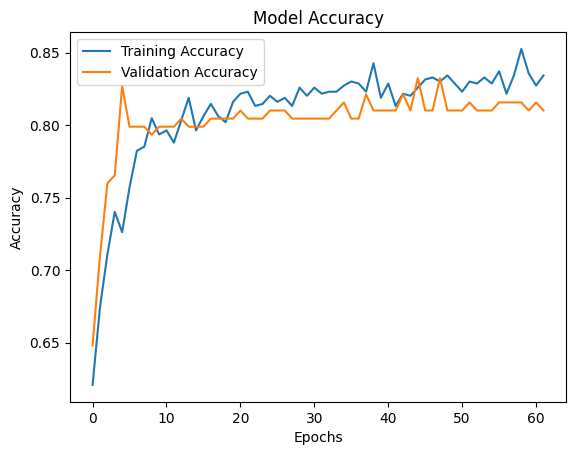

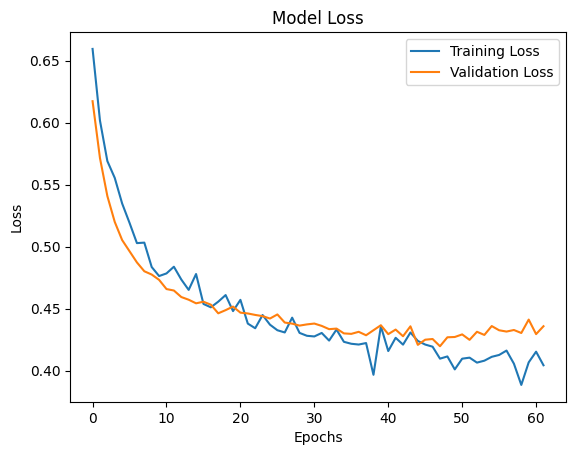

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


Accuracy on Test Data: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 1: Data Preprocessing
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
df = df[features + [target]]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Normalize numerical columns
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input + Hidden Layer 1
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=62, batch_size=32)

# Step 4: Evaluate the Model
# Training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Final evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save the model
model.save("titanic_neural_network.h5")